In [2]:
#Importação de bibliotecas
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

RuntimeError: The current Numpy installation ('c:\\users\\gustavorobertmourada\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\numpy\\__init__.py') fails to pass a sanity check due to a bug in the windows runtime. See this issue for more information: https://tinyurl.com/y3dm3h86

In [5]:
#Dados Brutos

candidatos2016 = pd.read_csv(r'datasets/consulta_cand_2016_SP.csv', delimiter=';', encoding='latin-1', usecols=['SQ_CANDIDATO','NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'NM_UE'])
candidatos2020 = pd.read_csv(r'datasets/consulta_cand_2020_SP.csv', delimiter=';', encoding='latin-1', usecols=['SQ_CANDIDATO','NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'NM_UE'])

bens_2016 = pd.read_csv(r'datasets/bem_candidato_2016_SP.csv', delimiter=';', encoding='latin-1', decimal=',', usecols=['SQ_CANDIDATO','VR_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO'])
bens_2020 = pd.read_csv(r'datasets/bem_candidato_2020_SP.csv', delimiter=';', encoding='latin-1', decimal=',', usecols=['SQ_CANDIDATO','VR_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO'])

In [6]:
candidatos2016.head()

,NM_UE,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO
0,SÃO JOÃO DO PAU D'ALHO,250000042993,43,IDEVALTE UNGARI,NENO,PV
1,SÃO SEBASTIÃO DA GRAMA,250000033411,22,RAFAEL MASCHERIN MONTOURO,RAFA DO GÁS,PR
2,SÃO PAULO,250000019188,14010,GLEISON JOÃO GOMES PEGO,GLEISON PEGO - MINEIRO,PTB
3,ARARAQUARA,250000015204,14140,DIVA APARECIDA LORANDO,DIVA DA SANTA CASA,PTB
4,SANTOS,250000039689,43222,ORLANDO COUTO JUNIOR,PROFESSOR ORLANDO,PV


In [7]:
bens_2016.head()

,SQ_CANDIDATO,VR_BEM_CANDIDATO
0,250000004546,250000.0
1,250000004546,95000.0
2,250000004546,350000.0
3,250000004547,224777.2
4,250000004547,51000.0


In [8]:
soma_bens_16 = bens_2016.groupby('SQ_CANDIDATO').sum()
soma_bens_20 = bens_2020.groupby('SQ_CANDIDATO').sum()

In [9]:
soma_bens_16.head()

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
250000004546,695000.00
250000004547,275777.20
250000004548,139387.96
250000004549,17704.00
250000004550,190884.38


In [10]:
cand_merge_bens_16 = pd.merge(candidatos2016, soma_bens_16, how='left', left_on=['SQ_CANDIDATO'], right_on=['SQ_CANDIDATO'])
cand_merge_bens_20 = pd.merge(candidatos2020, soma_bens_20, how='left', left_on=['SQ_CANDIDATO'], right_on=['SQ_CANDIDATO'])

In [11]:
cand_merge_bens_16.head(10)

,NM_UE,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,VR_BEM_CANDIDATO
0,SÃO JOÃO DO PAU D'ALHO,250000042993,43,IDEVALTE UNGARI,NENO,PV,192000.0
1,SÃO SEBASTIÃO DA GRAMA,250000033411,22,RAFAEL MASCHERIN MONTOURO,RAFA DO GÁS,PR,257000.0
2,SÃO PAULO,250000019188,14010,GLEISON JOÃO GOMES PEGO,GLEISON PEGO - MINEIRO,PTB,NaN
3,ARARAQUARA,250000015204,14140,DIVA APARECIDA LORANDO,DIVA DA SANTA CASA,PTB,NaN
4,SANTOS,250000039689,43222,ORLANDO COUTO JUNIOR,PROFESSOR ORLANDO,PV,440000.0
5,RIO GRANDE DA SERRA,250000006369,51234,MARIA APARECIDA BARBOSA SANTOS,MISSIONARIA CIDA SANTOS,PATRIOTA,220000.0
6,PIRACAIA,250000090705,17126,JOSE BUENO,ZÉ PINGÓ,PSL,NaN
7,CAIUÁ,250000032612,45123,MARIA LUCIA DE JESUS FREITAS,LENI DA SAUDE,PSDB,NaN
8,MONTE CASTELO,250000053454,13123,ANTONIO SALUSTRIANO DE FARIAS,TONHO SALÚ,PT,7000.0
9,CHARQUEADA,250000041043,40111,VALTER APARECIDO TREVISAN,TICO TREVISAN,PSB,50000.0


# Candidatos reeleitos de São José dos Campos

Eleição 2016:

* Dulce Rita (PSDB) - 8.459 (2,43%) -                   | 250000042617 
* Dr. Elton (MDB) - 7.395 (2,13%) -                     | 250000037148
* Amélia Naomi (PT) - 5.240 (1,51%) -                   | 250000033606
* Marcão da Academia ao Ar Livre (DEM) - 4.470 (1,28%)  | 250000014482
* Robertinho da Padaria (Cidadania) - 4.412 (1,27%)     | 250000022736
* Juvenil Silvério (PSDB) - 4.119 (1,18%) -             | 250000042628
* Lino Bispo (PL) - 3.841 (1,10%) -                     | 250000040046
* Roberto do Eleven (PSDB) - 3.711 (1,07%) -            | 250000050545
* Walter Hayashi (PSC) - 2.885 (0,83%) -                | 250000037122
* Juliana Fraga (PT) - 2.689 (0,77%) -                  | 250000033624
* Zé Luís (PSD) - 1.908 (0,55%) -                       | 250000013030


Eleição 2020:

* Dulce Rita (PSDB) - 8.459 (2,43%) -                   | 250000693458 
* Dr. Elton (MDB) - 7.395 (2,13%) -                     | 250000637943
* Amélia Naomi (PT) - 5.240 (1,51%) -                   | 250000753710
* Marcão da Academia ao Ar Livre (DEM) - 4.470 (1,28%)  | 250000809155
* Robertinho da Padaria (Cidadania) - 4.412 (1,27%)     | 250000693849
* Juvenil Silvério (PSDB) - 4.119 (1,18%) -             | 250000693451
* Lino Bispo (PL) - 3.841 (1,10%) -                     | 250001044545
* Roberto do Eleven (PSDB) - 3.711 (1,07%) -            | 250000693448
* Walter Hayashi (PSC) - 2.885 (0,83%) -                | 250000681757
* Juliana Fraga (PT) - 2.689 (0,77%) -                  | 250000753707
* Zé Luís (PSD) - 1.908 (0,55%) -                       | 250000643180

In [28]:
cand_sjc = cand_merge_bens_16[cand_merge_bens_16['NM_UE'] == 'SÃO JOSÉ DOS CAMPOS']

In [30]:
cand_sjc

,NM_UE,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,VR_BEM_CANDIDATO
86,SÃO JOSÉ DOS CAMPOS,250000014486,14200,SILVIO DO CARMO CAMARGO,MANINHO CEM POR CENTO,PTB,16055.99
128,SÃO JOSÉ DOS CAMPOS,250000033621,13700,IVANILDA MARTINS VENÂNCIO,NILDA VENÂNCIO,PT,49045.54
239,SÃO JOSÉ DOS CAMPOS,250000050552,10900,WILLIAM FERREIRA DE SOUZA,WILLIAM LOKO,PRB,NaN
521,SÃO JOSÉ DOS CAMPOS,250000033633,13017,VANGIVALDO DA SILVA ALVES,WANGY ALVES,PT,85655.02
801,SÃO JOSÉ DOS CAMPOS,250000037151,15876,CARLOS AUGUSTO DE OLIVEIRA E SILVA CORREIA,PROFESSOR CARLÃO,PMDB,20000.00
...,...,...,...,...,...,...,...
86638,SÃO JOSÉ DOS CAMPOS,250000042635,45455,SIDNEY DE SIQUEIRA CAMPOS FERNANDES,SIDNEY CAMPOS,PSDB,NaN
86680,SÃO JOSÉ DOS CAMPOS,250000042625,45613,PAULO EDUARDO NARCISO,PAULO NARCISO,PSDB,NaN
86696,SÃO JOSÉ DOS CAMPOS,250000010547,77185,KARINA ALESSANDRA RAMOS DOS SANTOS,KARINA RAMOS,SD,NaN
86703,SÃO JOSÉ DOS CAMPOS,250000020585,43456,ANDRE LUIZ RODRIGUES DA SILVA DE CASTRO,ANDREZINHO DO PADRE JOÃO,PV,51000.00


In [47]:


list_SQ_CANDIDATO_2016 = [250000042617, 250000037148, 250000033606, 250000014482, 250000022736, 250000042628, 250000040046, 250000050545, 250000037122, 250000033624, 250000013030]

reeleitos2016 = cand_merge_bens_16[cand_merge_bens_16['SQ_CANDIDATO'].isin(list_SQ_CANDIDATO_2016)].sort_values(by='VR_BEM_CANDIDATO', ascending=False)


In [48]:
reeleitos2016

,NM_UE,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,VR_BEM_CANDIDATO
8424,SÃO JOSÉ DOS CAMPOS,250000040046,22100,LINO BISPO DA ROCHA,LINO BISPO,PR,1882000.00
26799,SÃO JOSÉ DOS CAMPOS,250000042628,45654,JUVENIL DE ALMEIDA SILVERIO,JUVENIL SILVERIO,PSDB,888000.00
84023,SÃO JOSÉ DOS CAMPOS,250000037148,15192,ELTON ALVES RIBEIRO DE CARVALHO JUNIOR,DR. ELTON JUNIOR,PMDB,880898.10
67919,SÃO JOSÉ DOS CAMPOS,250000050545,10000,JOSÉ ROBERTO DE CASTRO MORAIS,ROBERTO DO ELEVEN,PRB,876670.91
6482,SÃO JOSÉ DOS CAMPOS,250000037122,20100,WALTER KATSUNORI HAYASHI,WALTER HAYASHI,PSC,593000.00
10923,SÃO JOSÉ DOS CAMPOS,250000013030,55055,JOSÉ LUIS NUNES DO COUTO,ZÉ LUIS,PSD,380000.00
5224,SÃO JOSÉ DOS CAMPOS,250000033606,13500,AMELIA NAOMI OMURA,AMELIA NAOMI,PT,254143.23
44786,SÃO JOSÉ DOS CAMPOS,250000042617,45400,DULCE RITA CHAVES DE ANDRADE DABKIWICZ,DULCE RITA,PSDB,173000.00
62155,SÃO JOSÉ DOS CAMPOS,250000033624,13222,JULIANA FRAGA E SILVA DE SOUZA,JULIANA FRAGA,PT,139129.67
57494,SÃO JOSÉ DOS CAMPOS,250000022736,23023,ROBERTO DA PENHA RAMOS,ROBERTINHO DA PADARIA,PPS,137764.04


In [1]:
#Ordenar candidatos reeleitos por valor do bem del

list_SQ_CANDIDATO_2020 = [250000693458, 250000637943, 250000753710, 250000809155, 250000693849, 250000693451, 250001044545, 250000693448, 250000681757, 250000753707, 250000643180]

reeleitos2020 = cand_merge_bens_20[cand_merge_bens_20['SQ_CANDIDATO'].isin(list_SQ_CANDIDATO_2020)].sort_values(by='VR_BEM_CANDIDATO', ascending=False)

colunasSelecionadas2020 = reeleitos2020.filter(items=['NM_URNA', VR_BEM_CANDIDATO])

NameError: name 'cand_merge_bens_20' is not defined

In [39]:
reeleitos2020

,NM_UE,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,VR_BEM_CANDIDATO
55365,SÃO JOSÉ DOS CAMPOS,250001044545,22100,LINO BISPO DA ROCHA,LINO BISPO,PL,2559749.00
50256,SÃO JOSÉ DOS CAMPOS,250000637943,15192,ELTON ALVES RIBEIRO DE CARVALHO JUNIOR,DR ELTON,MDB,1465676.85
47008,SÃO JOSÉ DOS CAMPOS,250000693451,45654,JUVENIL DE ALMEIDA SILVÉRIO,JUVENIL SILVÉRIO,PSDB,899074.86
41361,SÃO JOSÉ DOS CAMPOS,250000693448,45111,JOSÉ ROBERTO DE CASTRO MORAIS,ROBERTO DO ELEVEN,PSDB,886275.11
44986,SÃO JOSÉ DOS CAMPOS,250000643180,55055,JOSE LUIS NUNES DO COUTO,ZÉ LUIS,PSD,676000.00
55986,SÃO JOSÉ DOS CAMPOS,250000753707,13222,JULIANA FRAGA E SILVA DE SOUZA,JULIANA FRAGA,PT,363856.62
28390,SÃO JOSÉ DOS CAMPOS,250000681757,20100,WALTER KATSUNORI HAYASHI,WALTER HAYASHI,PSC,288827.24
44427,SÃO JOSÉ DOS CAMPOS,250000693849,23023,ROBERTO DA PENHA RAMOS,ROBERTINHO DA PADARIA,CIDADANIA,234576.39
11707,SÃO JOSÉ DOS CAMPOS,250000693458,45400,DULCE RITA CHAVES DE ANDRADE DABKIWICZ,DULCE RITA,PSDB,176100.00
75963,SÃO JOSÉ DOS CAMPOS,250000753710,13500,AMÉLIA NAOMI OMURA,AMÉLIA NAOMI,PT,103192.41


AttributeError: 'AxesSubplot' object has no attribute 'sort_values'

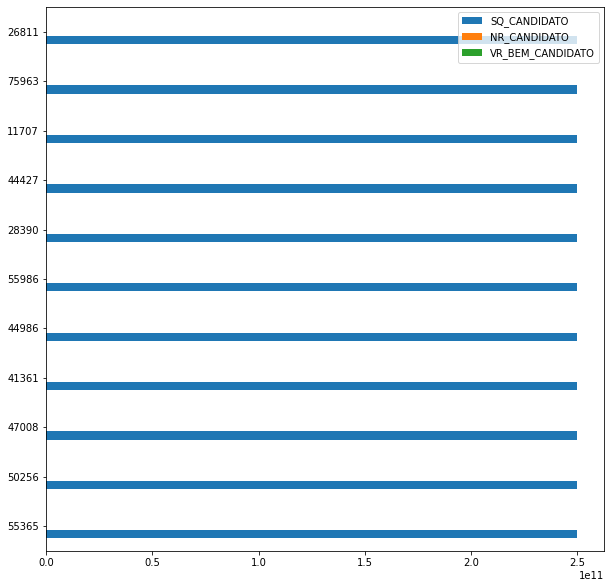

In [38]:

reeleitos2020.plot(kind='barh', figsize=(10,10)).sort_values(['VR_BEM_CANDIDATO'])